Датасет: https://www.kaggle.com/START-UMD/gtd
Global Terrorism Database
More than 180,000 terrorist attacks worldwide, 1970-2017

Предсказываем успешность террористической атаки /*исключительно в учебных целях*/

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', error_bad_lines=False, encoding='latin1').drop_duplicates()
df 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


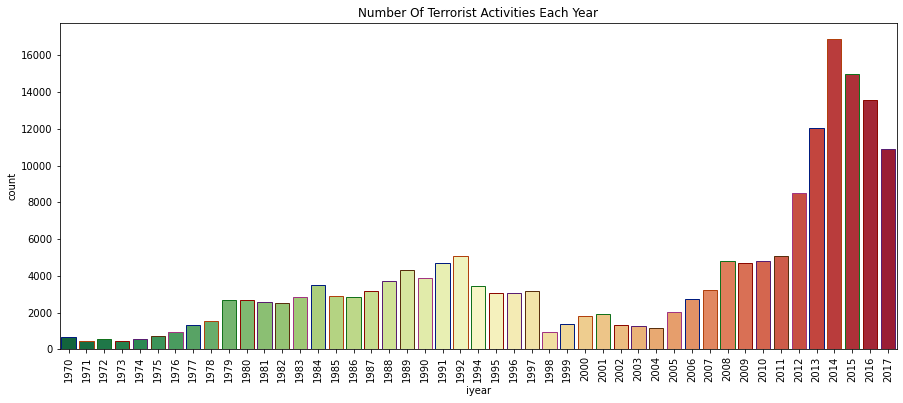

In [4]:
import seaborn as sns
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


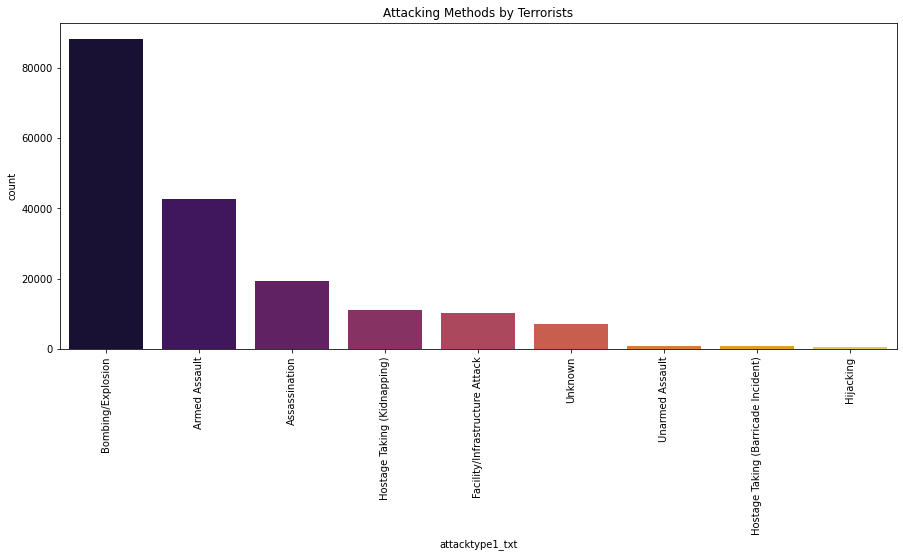

In [6]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=df,palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

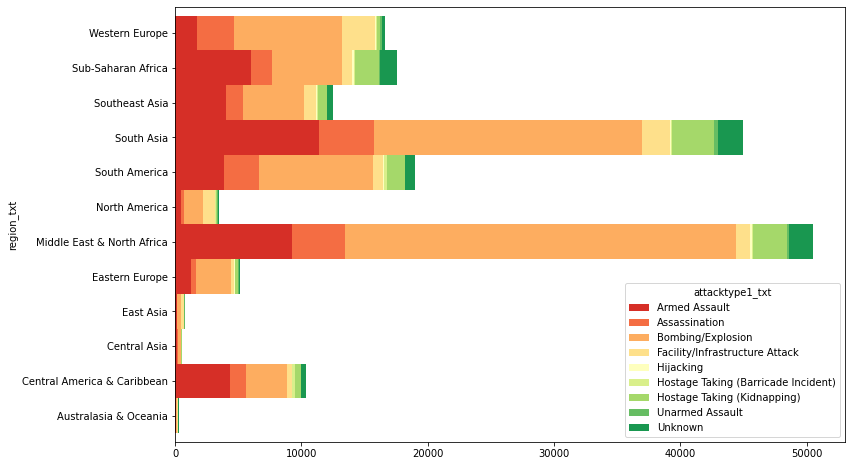

In [7]:
pd.crosstab(df.region_txt,df.attacktype1_txt).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

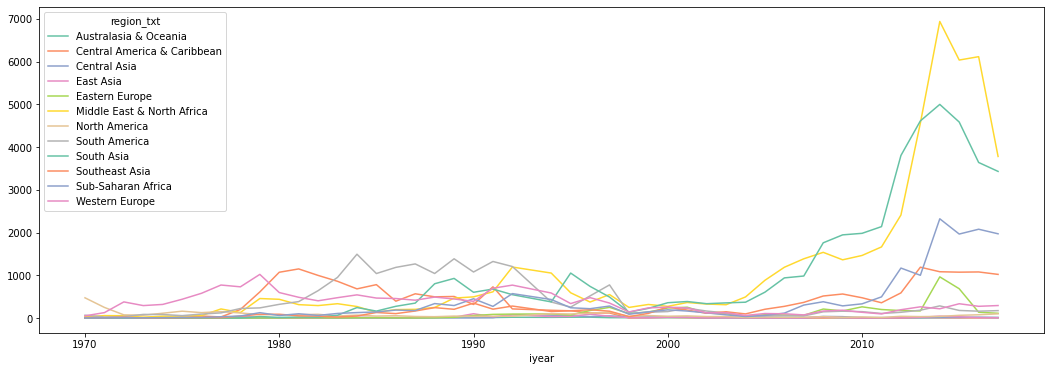

In [9]:
terror_region=pd.crosstab(df.iyear,df.region_txt)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


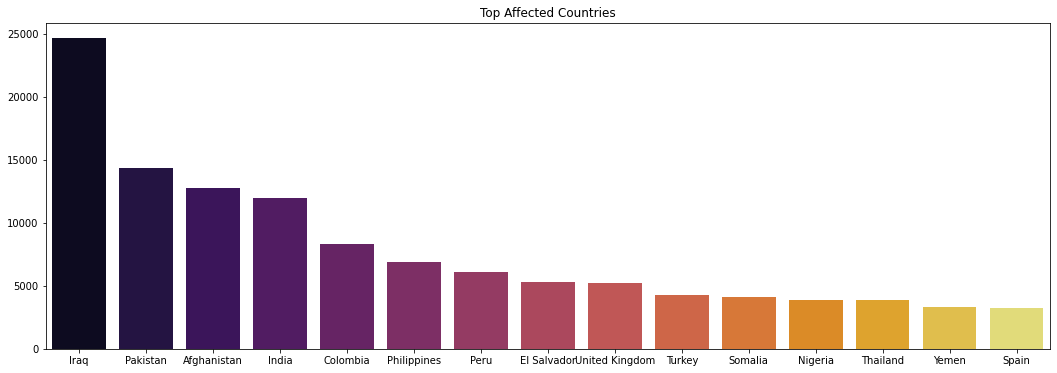

In [8]:
plt.subplots(figsize=(18,6))
sns.barplot(df['country_txt'].value_counts()[:15].index,df['country_txt'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

In [ ]:
df['country_txt'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [ ]:
df.groupby(['country_txt', 'country']).size().to_frame().sort_values(by ='country')

,,0
country_txt,country,
Afghanistan,4,12731
Albania,5,80
Algeria,6,2743
Andorra,7,1
Angola,8,499
...,...,...
People's Republic of the Congo,605,4
Serbia,1001,12
Montenegro,1002,5


Выше страны по которым данные в выборке. В выборке есть уже как и числовые значения для данных, так и текстовые - сформируем датасет только из числовых значений.

In [ ]:
df.groupby(['weaptype1_txt', 'weaptype1']).size().to_frame().sort_values(by ='weaptype1')

,,0
weaptype1_txt,weaptype1,
Biological,1,35
Chemical,2,321
Radiological,3,14
Firearms,5,58524
Explosives,6,92426
Fake Weapons,7,33
Incendiary,8,11135
Melee,9,3655
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",10,136


In [ ]:
df.groupby(['attacktype1_txt', 'attacktype1']).size().to_frame().sort_values(by ='attacktype1')

,,0
attacktype1_txt,attacktype1,
Assassination,1,19312
Armed Assault,2,42669
Bombing/Explosion,3,88255
Hijacking,4,659
Hostage Taking (Barricade Incident),5,991
Hostage Taking (Kidnapping),6,11158
Facility/Infrastructure Attack,7,10356
Unarmed Assault,8,1015
Unknown,9,7276


In [ ]:
df = df[['imonth','iday', 'extended', 'country', 'region','latitude', 'longitude','multiple',  'suicide',
       'attacktype1','targtype1',
       'natlty1', 'individual','weaptype1','nkill','success']]
df

,imonth,iday,extended,country,region,latitude,longitude,multiple,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill,success
0,7,2,0,58,2,18.456792,-69.951164,0.0,0,1,14,58.0,0,13,1.0,1
1,0,0,0,130,1,19.371887,-99.086624,0.0,0,6,7,21.0,0,13,0.0,1
2,1,0,0,160,5,15.478598,120.599741,0.0,0,1,10,217.0,0,13,1.0,1
3,1,0,0,78,8,37.997490,23.762728,0.0,0,3,7,217.0,0,6,NaN,1
4,1,0,0,101,4,33.580412,130.396361,0.0,0,7,7,217.0,0,8,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,12,31,0,182,11,2.359673,45.385034,0.0,0,2,4,182.0,0,5,1.0,1
181687,12,31,0,200,10,35.407278,35.942679,0.0,0,3,4,167.0,0,6,2.0,1
181688,12,31,0,160,5,6.900742,124.437908,0.0,0,7,14,160.0,0,8,0.0,1
181689,12,31,0,92,6,24.798346,93.940430,0.0,0,3,2,92.0,0,6,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   imonth       181691 non-null  int64  
 1   iday         181691 non-null  int64  
 2   extended     181691 non-null  int64  
 3   country      181691 non-null  int64  
 4   region       181691 non-null  int64  
 5   latitude     177135 non-null  float64
 6   longitude    177134 non-null  float64
 7   multiple     181690 non-null  float64
 8   suicide      181691 non-null  int64  
 9   attacktype1  181691 non-null  int64  
 10  targtype1    181691 non-null  int64  
 11  natlty1      180132 non-null  float64
 12  individual   181691 non-null  int64  
 13  weaptype1    181691 non-null  int64  
 14  nkill        171378 non-null  float64
 15  success      181691 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 23.6 MB


In [ ]:
df.dtypes

imonth           int64
iday             int64
extended         int64
country          int64
region           int64
latitude       float64
longitude      float64
multiple       float64
suicide          int64
attacktype1      int64
targtype1        int64
natlty1        float64
individual       int64
weaptype1        int64
nkill          float64
success          int64
dtype: object

In [ ]:
df.describe()

,imonth,iday,extended,country,region,latitude,longitude,multiple,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill,success
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181690.000000,181691.000000,181691.000000,181691.000000,180132.000000,181691.000000,181691.000000,171378.000000,181691.000000
mean,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,0.137773,0.036507,3.247547,8.439719,127.686441,0.002950,6.447325,2.403272,0.889598
std,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.344663,0.187549,1.915772,6.653838,89.299120,0.054234,2.173435,11.545741,0.313391
min,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000
25%,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,0.000000,0.000000,2.000000,3.000000,83.000000,0.000000,5.000000,0.000000,1.000000
50%,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,0.000000,0.000000,3.000000,4.000000,101.000000,0.000000,6.000000,0.000000,1.000000
75%,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,0.000000,0.000000,3.000000,14.000000,173.000000,0.000000,6.000000,2.000000,1.000000
max,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,13.000000,1570.000000,1.000000


Есть пропуски - уберем их

In [ ]:
df=df.dropna()
df

,imonth,iday,extended,country,region,latitude,longitude,multiple,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill,success
0,7,2,0,58,2,18.456792,-69.951164,0.0,0,1,14,58.0,0,13,1.0,1
1,0,0,0,130,1,19.371887,-99.086624,0.0,0,6,7,21.0,0,13,0.0,1
2,1,0,0,160,5,15.478598,120.599741,0.0,0,1,10,217.0,0,13,1.0,1
5,1,1,0,217,1,37.005105,-89.176269,0.0,0,2,3,217.0,0,5,0.0,1
6,1,2,0,218,3,-34.891151,-56.187214,0.0,0,1,3,218.0,0,5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,12,31,0,182,11,2.359673,45.385034,0.0,0,2,4,182.0,0,5,1.0,1
181687,12,31,0,200,10,35.407278,35.942679,0.0,0,3,4,167.0,0,6,2.0,1
181688,12,31,0,160,5,6.900742,124.437908,0.0,0,7,14,160.0,0,8,0.0,1
181689,12,31,0,92,6,24.798346,93.940430,0.0,0,3,2,92.0,0,6,0.0,0


Кодировку производить не нужно

In [ ]:
df.groupby('success').count()

,imonth,iday,extended,country,region,latitude,longitude,multiple,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill
success,,,,,,,,,,,,,,,
0,18862,18862,18862,18862,18862,18862,18862,18862,18862,18862,18862,18862,18862,18862,18862
1,147009,147009,147009,147009,147009,147009,147009,147009,147009,147009,147009,147009,147009,147009,147009


In [ ]:
counts = df.success.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('В датафрейме {} неуспешных атак ({:.3f}%) и {} успешных ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

В датафрейме 18862 неуспешных атак (11.371%) и 147009 успешных (88.629%).


Данные не сбалансированные, нужна аугментация для балансировки

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f07a3ee50>,
      dtype=object)

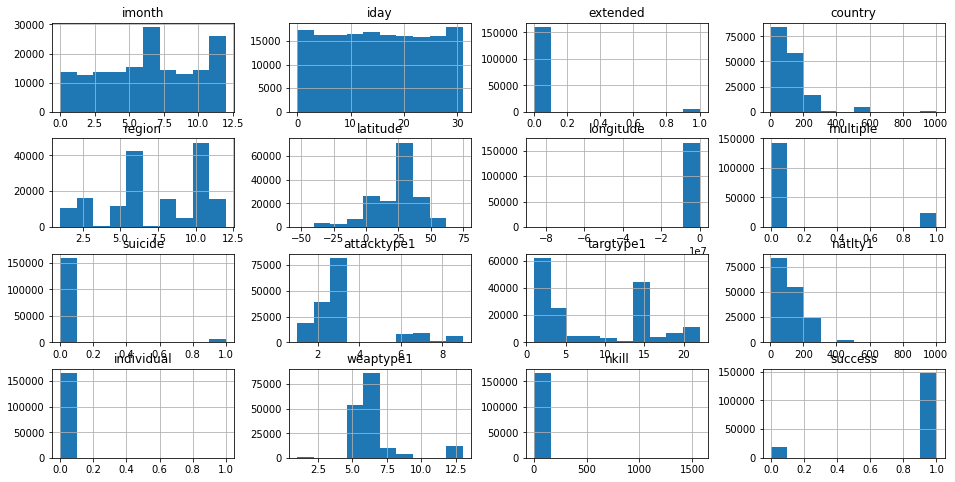

In [ ]:
df.hist(figsize=(16,8))

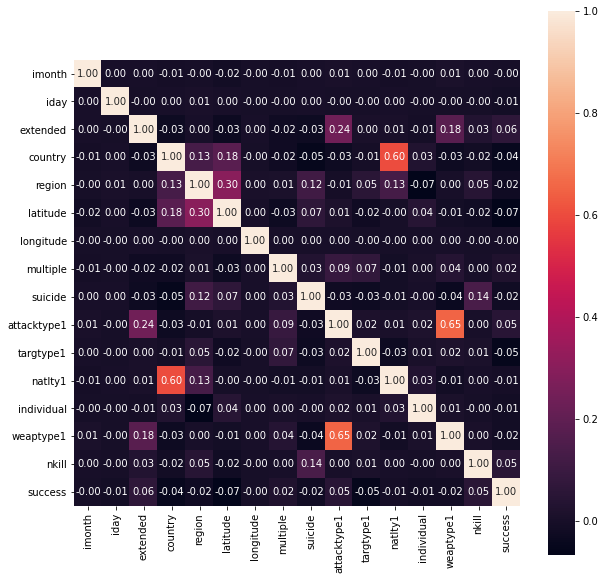

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
plt.show()

Сильных корреляций между зависимой переменной и регрессорами нет. Однако, есть сильная линейная зависимость между natity1 и country (что логично, так как на одной территории скорее всего проживают люди одной национальности), weaptype1 и attacktype1 (что также логично, тк вариантов использования одного оружия не так много). Избавимся от одной из сильно коррелирующих колонок, тк по смыслу они дублируют друг друга и могут привести к смещениям. Оставим natity1 и weaptype1 , так как у этих переменных меньше показатели корреляций с другими переменными.

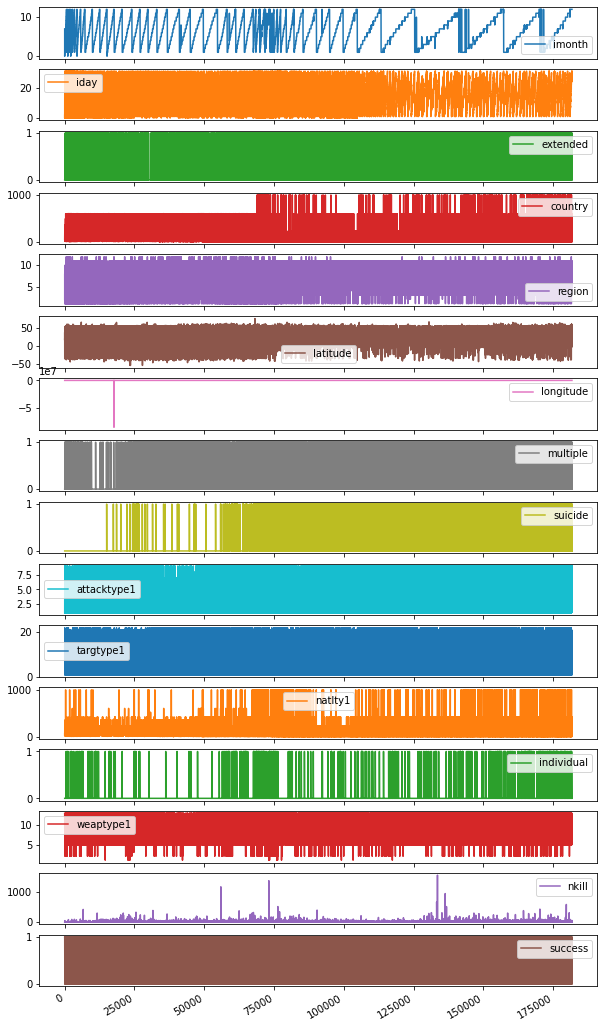

In [ ]:
df.plot(subplots=True, figsize = (10, 20))
plt.show()

На графике видны выбросы в виде longitude < -5 и nkill >= 1000 . Исключим их из выборки

In [ ]:
df1 = df.drop(df[(df.longitude < -5)].index) 
df2=df1.drop(df1[(df1.nkill >= 1000)].index)
df2

,imonth,iday,extended,country,region,latitude,longitude,multiple,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill,success
2,1,0,0,160,5,15.478598,120.599741,0.0,0,1,10,217.0,0,13,1.0,1
12,1,8,0,98,8,41.890961,12.490069,0.0,0,4,6,217.0,0,5,0.0,1
26,1,21,0,160,5,14.674280,121.057495,0.0,0,3,7,217.0,0,6,0.0,1
39,1,31,0,160,5,15.675051,120.331618,0.0,0,9,4,217.0,0,13,0.0,0
59,2,10,0,362,8,48.139126,11.580186,0.0,0,2,6,97.0,0,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,12,31,0,182,11,2.359673,45.385034,0.0,0,2,4,182.0,0,5,1.0,1
181687,12,31,0,200,10,35.407278,35.942679,0.0,0,3,4,167.0,0,6,2.0,1
181688,12,31,0,160,5,6.900742,124.437908,0.0,0,7,14,160.0,0,8,0.0,1
181689,12,31,0,92,6,24.798346,93.940430,0.0,0,3,2,92.0,0,6,0.0,0


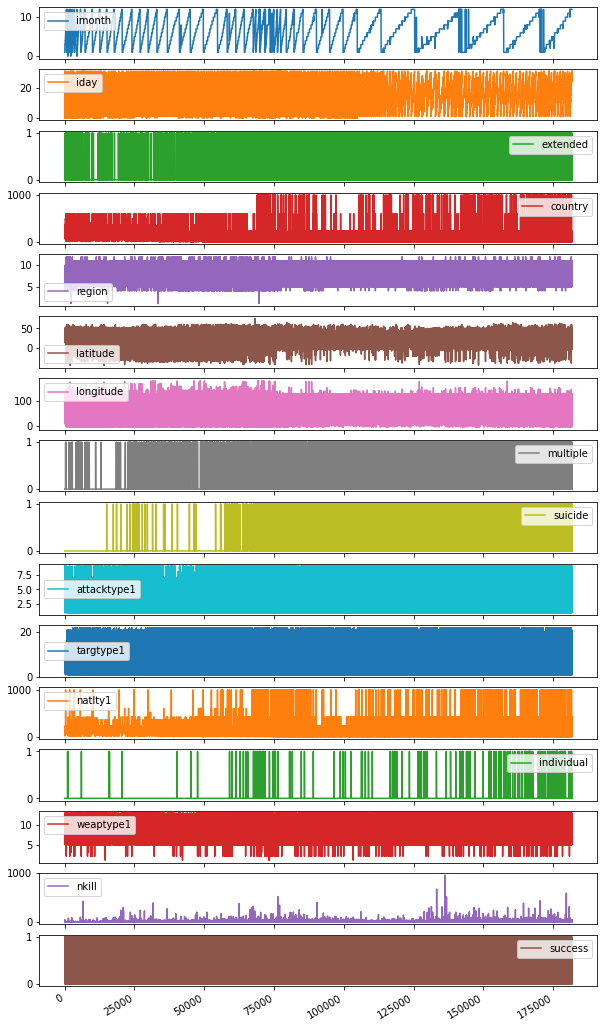

In [ ]:
df2.plot(subplots=True, figsize = (10, 20))
plt.show()

In [ ]:
counts = df2.success.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('В финальном обработанном датафрейме {} неуспешных атак ({:.3f}%) и {} успешных ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

В финальном обработанном датафрейме 15636 неуспешных атак (11.718%) и 117802 успешных (88.282%).


In [ ]:
X = np.array(df2[df2._get_numeric_data().columns])
y = np.array(df2['success'], dtype='int')

Полиномиальные не делаю, тк достаточно наблюдений

Стандартизация:

In [ ]:
# нормализация
def normalize(df2, df_type = 'train', mean = None, std = None):
    if df_type == 'train':
        X_train = df2.drop(columns=['success']).values
        y_train = df2['success'].values

        mean = X_train.mean(axis=0)
        std = X_train.std(axis=0)

        X_train = (X_train - mean)/std

        return X_train, y_train, mean, std
    else:
        X_train = df2.drop(columns=['success']).values
        y_train = df2['success'].values

        return (X_train - mean)/std, y_train, mean, std

Делим на train, test

In [ ]:
train_size = 0.8

# перемешка
df = df2.sample(frac=1).reset_index(drop=True)

X_train, y_train, mean, std = normalize(df2[:int(train_size*len(df2))])
X_test, y_test, mean, std = normalize(df2[int(train_size*len(df2)):], df_type = 'test', mean = mean, std = std)

In [ ]:
X_train.shape, X_test.shape

((106750, 15), (26688, 15))

In [ ]:
y_train.shape, y_test.shape

((106750,), (26688,))

In [ ]:
X_train

array([[-1.58513916, -1.75268246, -0.19262016, ..., -0.03326574,
         3.38094719, -0.14524443],
       [-1.58513916, -0.84568053, -0.19262016, ..., -0.03326574,
        -0.67237722, -0.24826528],
       [-1.58513916,  0.62819761, -0.19262016, ..., -0.03326574,
        -0.16571167, -0.24826528],
       ...,
       [ 0.49785607,  0.28807188, -0.19262016, ..., -0.03326574,
        -0.67237722, -0.24826528],
       [ 0.49785607,  0.17469664, -0.19262016, ..., -0.03326574,
        -0.16571167, -0.24826528],
       [ 0.49785607,  0.17469664, -0.19262016, ..., -0.03326574,
        -0.16571167,  1.8121516 ]])

Аугментация:

In [ ]:
def oversample_data(X_train, y_train):
    return ADASYN(sampling_strategy='minority').fit_resample(np.array(X_train), np.array(y_train))

In [ ]:
def augment_data(X_train, y_train):
    try:
        X_train, y_train = oversample_data(X_train, y_train)
    except:
        pass
    # try:
    #     X, y = undersample_data(X, y)
    # except:
    #     pass
    return X_train, y_train

In [ ]:
X_train, y_train = augment_data(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((106750, 15), (106750,))

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Алгоритм (Логарифмическая регрессия)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
clf = LogisticRegression(class_weight = 'balanced')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train,y_train)

predictions = clf.predict(X_test)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.31      0.72      0.44      5154
           1       0.90      0.62      0.74     21534

    accuracy                           0.64     26688
   macro avg       0.61      0.67      0.59     26688
weighted avg       0.79      0.64      0.68     26688



у алгоритма не очень хорошая способность отличать классы (precision=0,31 и 0,9), но не плохая определять данный класс вообще (recall=0,72 и 0,62). Средняя гармоническая этих метрик средняя (F1=0,64)

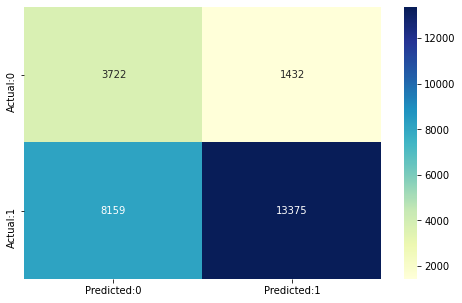

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

матрица показывает 3722 +13375 = 17097 правильных предсказаний и 1432+8159=9597 неправильных

True Positives: 13375

True Negatives: 3722

False Positives: 1432 (Type I error)

False Negatives: 8159 ( Type II error)

SVM и KNN не использую (они обучаются очень долго)

Ансамблевый метод - Дерево

In [ ]:
param_grid = {'min_samples_split': [i for i in range(70, 100, 2)],
              'max_depth': [i for i in range(10, 15)],
              'min_samples_leaf':[i for i in range(2, 6)]}
# перебираем параметра дерева по кросс-вал на 5 фолдах
tree = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, verbose=2,n_jobs=-1)
# обучаем
tree.fit(X_train, y_train)

predictions=tree.predict(X_test)
# находим лучшие параметры
tree.best_params_, tree.best_score_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.0min finished


({'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 84},
 0.9277002341920376)

In [ ]:
# Функция отрисовки графиков
def grid_plot(x, y, x_label, title, y_label='cross_val, accuracy'):
    # определили размер графика
    plt.figure(figsize=(12, 6))
    # добавили сетку на фон
    plt.grid(True)
    # построили по х - число соседей, по y - точность
    plt.plot(x, y, 'go-')
    # добавили подписи осей и название графика
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

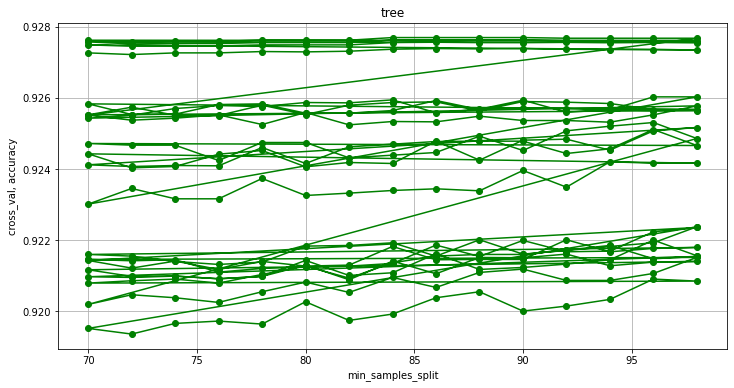

In [ ]:
grid_plot(np.array(tree.cv_results_['param_min_samples_split']), tree.cv_results_['mean_test_score'], 'min_samples_split', 'tree')

Лучшее значение 0,92

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.39      0.54      5154
           1       0.87      0.99      0.93     21534

    accuracy                           0.87     26688
   macro avg       0.88      0.69      0.73     26688
weighted avg       0.87      0.87      0.85     26688



Тут увеличивается способность отличать классы (precision=0,83 и 0,87), но уменьшаяется определять данный класс вообще (recall=0,39 и 0,99). Средняя гармоническая этих метрик высокая (F1=0,87)

Случайный лес:

In [ ]:
# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 10)],
              'max_features': [2, len(X_train[0])-1]
              }

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,verbose=2,n_jobs=-1)
gs.fit(X_train, y_train)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
predictions=gs.predict(X_test)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 89.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 179.3min
[Parallel(n_jobs=-1)]: Done 1040 out of 1040 | elapsed: 193.7min finished


({'max_depth': 14, 'max_features': 14, 'min_samples_split': 2},
 0.9241122523099687)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.42      0.56      3781
           1       0.93      0.99      0.96     29394

    accuracy                           0.93     33175
   macro avg       0.89      0.70      0.76     33175
weighted avg       0.92      0.93      0.91     33175



Случайный лес не на много лучше деревьев, лучшим предсказательным методом считаю в этом случае деревья (он быстрее). Классы конечно определяются не очень хорошо во всех моделях, возможно нужно было сделать undersampling в аугментации